In [37]:
#Task 1: Preprocessing

In [38]:
import pandas as pd
df= pd.read_csv('BD.csv',",")
'Heart Failure Prediction Dataset'
'11 clinical features for predicting heart disease events.'
df.head()
" Le but de ce projet est de prédire si une personne a une maladie "
"cardiaque ou pas aprèzs avoir fait certains examens pour remplir les données relatives"

'cardiaque ou pas aprèzs avoir fait certains examens pour remplir les données relatives'

In [39]:
df.isnull().sum()
"Vu que cette base de donnée ne contient pas de valeurs nulles nous pouvons passer directement à la phase visualisation"

'Vu que cette base de donnée ne contient pas de valeurs nulles nous pouvons passer directement à la phase visualisation'

In [40]:
df.replace({'Sex':{'M': 2,'F':3}},inplace=True)
df.head()
"pour cette commande, nous avons convertit les Sex de chaines de caractères vers des valeurs numériques"

'pour cette commande, nous avons convertit les Sex de chaines de caractères vers des valeurs numériques'

'so we dont have missing values'

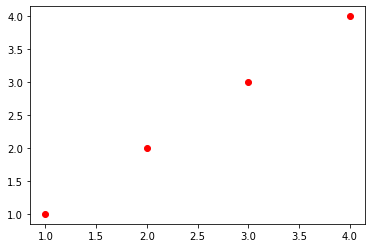

In [41]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[1,2,3,4],'ro')
plt.show()

In [42]:
df2=df[(df['HeartDisease']==1)]
df2.head()
"Nous voulons visualiser la coordination entre les différentes valeurs et les personnes malades"
"pour ce faire, nous avons créé un nouveau dataset en filtrant juste les personnes malade (HeartDisease==1)"

'pour ce faire, nous avons créé un nouveau dataset en filtrant juste les personnes malade (HeartDisease==1)'

<AxesSubplot:title={'center':"Histogram of hearts' diseases"}, xlabel='Age', ylabel='Frequency'>

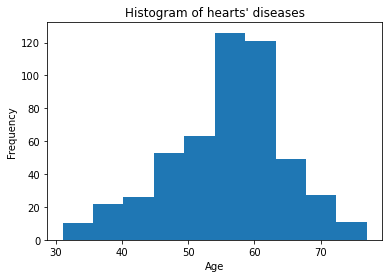

In [43]:
plt.title("Histogram of hearts' diseases")
plt.xlabel("Age")
df2['Age'].plot.hist()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

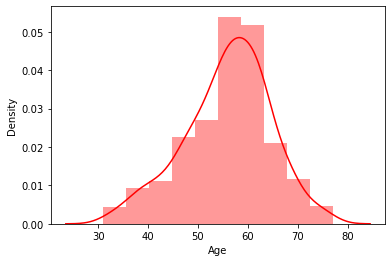

In [44]:
import seaborn as sns
sns.distplot(df2["Age"],bins=10,hist=True, kde=True,color="red")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RestingBP', ylabel='Density'>

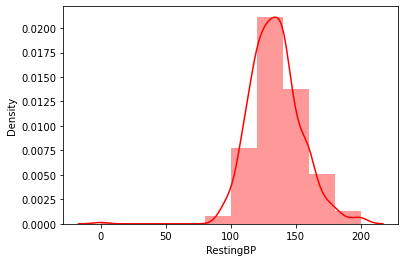

In [45]:
import seaborn as sns
sns.distplot(df2["RestingBP"],bins=10,hist=True, kde=True,color="red")

<AxesSubplot:title={'center':'Bar plot of Roles'}, xlabel='Sex: 2=Male, 3=Female ', ylabel='HeartDisease'>

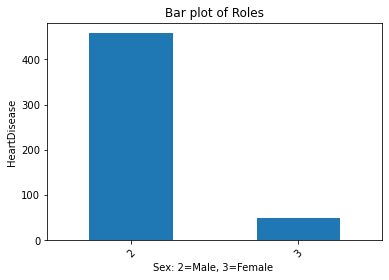

In [46]:
plt.xlabel("Sex: 2=Male, 3=Female ")
plt.ylabel("HeartDisease")
plt.title("Bar plot of Roles")
vc=df2['Sex'].value_counts()
vc.plot.bar(rot=45)

<AxesSubplot:title={'center':'Nombre de malades selon le ChestPainType'}, xlabel='ChestPainType', ylabel='Nombre de malades'>

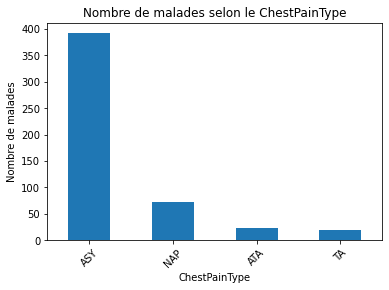

In [47]:
plt.xlabel("ChestPainType")
plt.ylabel("Nombre de malades")
plt.title("Nombre de malades selon le ChestPainType")
vc=df2['ChestPainType'].value_counts()
vc.plot.bar(rot=45)

<AxesSubplot:title={'center':'Nombre de malades selon le RestingECG'}, xlabel='RestingECG', ylabel='Nombre de malades'>

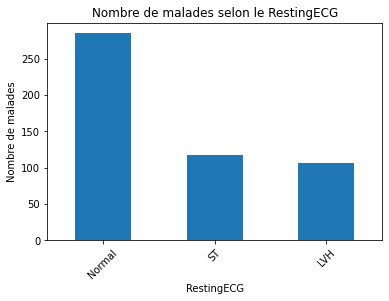

In [48]:
plt.xlabel("RestingECG")
plt.ylabel("Nombre de malades")
plt.title("Nombre de malades selon le RestingECG")
vc=df2['RestingECG'].value_counts()
vc.plot.bar(rot=45)

<AxesSubplot:title={'center':'Nombre de malades selon le ST_Slope'}, xlabel='RestingECG', ylabel='Nombre de malades'>

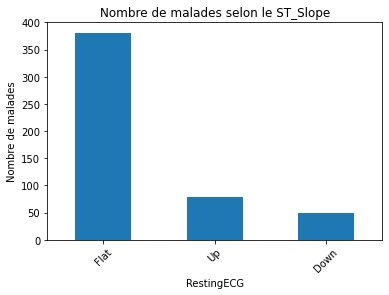

In [49]:
plt.xlabel("RestingECG")
plt.ylabel("Nombre de malades")
plt.title("Nombre de malades selon le ST_Slope")
vc=df2['ST_Slope'].value_counts()
vc.plot.bar(rot=45)

<AxesSubplot:>

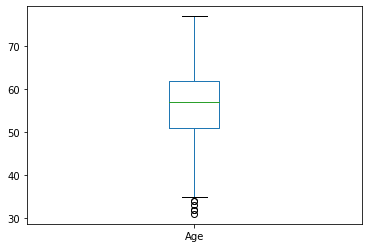

In [50]:
import matplotlib as plt
df2["Age"].plot.box()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxHR'>

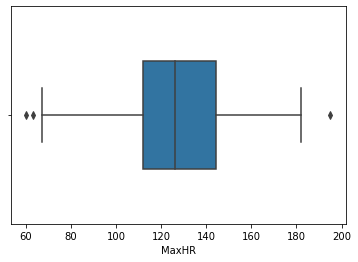

In [51]:
sns.boxplot(df2["MaxHR"], width=
            0.5)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


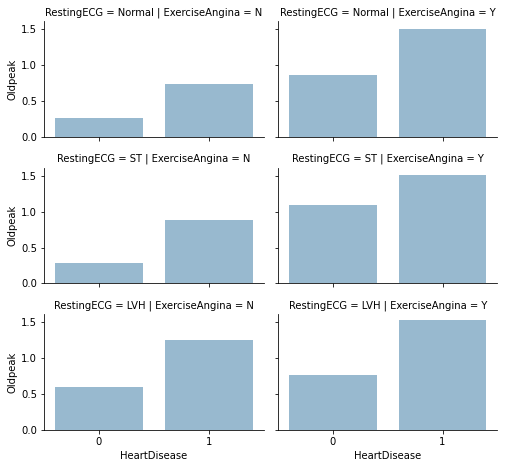

In [52]:
grid = sns.FacetGrid(df, row="RestingECG", col="ExerciseAngina", size=2.2, aspect=1.6)
grid.map(sns.barplot, "HeartDisease", 'Oldpeak', alpha=.5, ci=None)
grid.add_legend()


In [53]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = df[['RestingBP','MaxHR','Oldpeak', 'Cholesterol','Age']]
y = df['HeartDisease']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
" avec un taux de 0.76, on peut dire que notre modèle est acceptable"


Accuracy=0.76


' avec un taux de 0.76, on peut dire que notre modèle est acceptable'

In [54]:
type(x_test)
dfTest=pd.DataFrame(columns=x_test.columns)


"df[['         RestingBP','MaxHR','Oldpeak', 'Cholesterol','Age']]"
dfTest.loc[0]=[  160,        156,    1.0,        180,       80]


print(logreg.predict(dfTest))
W=logreg.predict(dfTest)
if W==0:
    print ("n'a une maladie cardiaque")
else :
    print(" a une maladie cardiaque")

[1]
 a une maladie cardiaque


"Si une personne avec un Resting BP ==160, MAXHR==156, OldPeak==1.0, Cholesterol==180, Age == 80 cette personne a une forte chance d'avoir une maladie cardiaque"

In [55]:
type(x_test)
dfTest=pd.DataFrame(columns=x_test.columns)


"df[['         RestingBP','MaxHR','Oldpeak', 'Cholesterol','Age']]"
dfTest.loc[0]=[  160,        156,    1.0,        180,       40]


print(logreg.predict(dfTest))
W=logreg.predict(dfTest)
if W==0:
    print ("n'a pas une maladie cardiaque")
else :
    print(" a une maladie cardiaque")

[0]
n'a pas une maladie cardiaque


"Si une autre personne a les même données que la première personne mais  elle est agée de 40 ans au lieu de 80ans, cette personne est alors pas malade"

In [56]:
import pandas as pd
df3=df
df3.replace({'ChestPainType':{'ATA':0,'ASY':1,'NAP':2}},inplace=True)
df3.replace({'RestingECG':{'Normal':1,'ST':2}},inplace=True)
df3.replace({'ExerciseAngina':{'N':1,'Y':2}},inplace=True)
df3.replace({'ST_Slope':{'Up':0,'Flat':1}},inplace=True)
df3.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,2,0,140,289,0,1,172,1,0.0,0,0
1,49,3,2,160,180,0,1,156,1,1.0,1,1
2,37,2,0,130,283,0,2,98,1,0.0,0,0
3,48,3,1,138,214,0,1,108,2,1.5,1,1
4,54,2,2,150,195,0,1,122,1,0.0,0,0


In [57]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
"preprocessing data by encording new values"

'preprocessing data by encording new values'

In [58]:
#Task 2: Unsupervised learning

In [59]:
#extract data
import pandas as pd
df= pd.read_csv('BD.csv',",")

In [60]:
#Those next operations aim to preprocess data by encoding values:

In [61]:
df.drop('HeartDisease', inplace=True, axis=1)

In [62]:
data=df

In [63]:
data.replace({'Sex':{'M': 0,'F':1}},inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up


In [64]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [65]:
data.replace({'ChestPainType':{'ATA': 0,'NAP':1,'ASY':2,'TA':3}},inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,289,0,Normal,172,N,0.0,Up
1,49,1,1,160,180,0,Normal,156,N,1.0,Flat
2,37,0,0,130,283,0,ST,98,N,0.0,Up
3,48,1,2,138,214,0,Normal,108,Y,1.5,Flat
4,54,0,1,150,195,0,Normal,122,N,0.0,Up


In [66]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [67]:
data.replace({'RestingECG':{'Normal': 0,'ST':1,'LVH':2}},inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,289,0,0,172,N,0.0,Up
1,49,1,1,160,180,0,0,156,N,1.0,Flat
2,37,0,0,130,283,0,1,98,N,0.0,Up
3,48,1,2,138,214,0,0,108,Y,1.5,Flat
4,54,0,1,150,195,0,0,122,N,0.0,Up


In [68]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [71]:
data.replace({'ExerciseAngina':{'N': 0,'Y':1}},inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,289,0,0,172,0,0.0,Up
1,49,1,1,160,180,0,0,156,0,1.0,Flat
2,37,0,0,130,283,0,1,98,0,0.0,Up
3,48,1,2,138,214,0,0,108,1,1.5,Flat
4,54,0,1,150,195,0,0,122,0,0.0,Up


In [72]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [73]:
data.replace({'ST_Slope':{'Up': 0,'Flat':1,'Down':2}},inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,289,0,0,172,0,0.0,0
1,49,1,1,160,180,0,0,156,0,1.0,1
2,37,0,0,130,283,0,1,98,0,0.0,0
3,48,1,2,138,214,0,0,108,1,1.5,1
4,54,0,1,150,195,0,0,122,0,0.0,0


In [74]:
#Set agglomerative clustering method to predict labels
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)

In [75]:
#Create a dataframe containing predicted labels
agglomerative=pd.DataFrame(clust_labels,columns=['clustering_label'])
agglomerative.head()

,clustering_label
0,0
1,0
2,0
3,0
4,0


In [76]:
agglomerative.value_counts('clustering_label')

clustering_label
0    910
1      8
dtype: int64

In [77]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

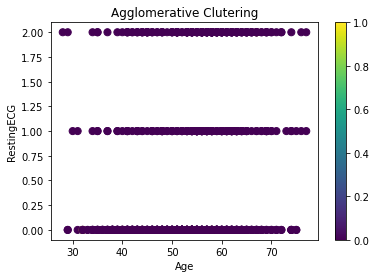

In [78]:
#plot obtained clusters in relation with two features: Age and RestingECG
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data['Age'] , data["RestingECG"] , c= agglomerative['clustering_label'], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Age")
ax.set_ylabel("RestingECG")
plt.colorbar(scatter)